In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df=pd.DataFrame(df)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

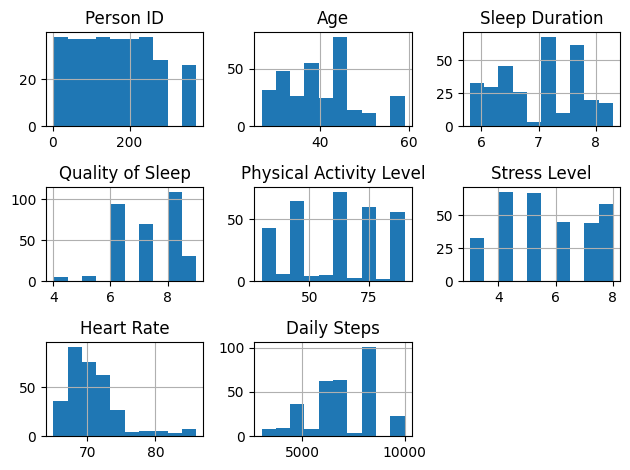

In [ ]:
df.hist()
plt.tight_layout()
plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-7-699201837c09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.987733,0.157775,0.341455,0.336861,-0.352244,-0.140497,0.152631
Age,0.987733,1.000000,0.219127,0.391296,0.374737,-0.382184,-0.136399,0.174445
Sleep Duration,0.157775,0.219127,1.000000,0.841215,0.619377,-0.736637,-0.370661,0.257934
Quality of Sleep,0.341455,0.391296,0.841215,1.000000,0.514558,-0.871575,-0.581523,0.278333
Physical Activity Level,0.336861,0.374737,0.619377,0.514558,1.000000,-0.304765,-0.059857,0.721224
Stress Level,-0.352244,-0.382184,-0.736637,-0.871575,-0.304765,1.000000,0.586415,-0.011513
Heart Rate,-0.140497,-0.136399,-0.370661,-0.581523,-0.059857,0.586415,1.000000,-0.253968
Daily Steps,0.152631,0.174445,0.257934,0.278333,0.721224,-0.011513,-0.253968,1.000000


<Axes: >

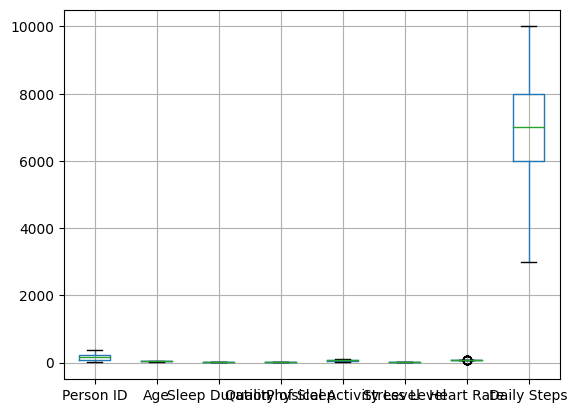

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,163.272152,40.237342,7.023418,7.151899,60.696203,5.556962,70.518987,6890.822785
std,99.953999,7.989914,0.703611,1.116555,19.469703,1.646521,4.042978,1521.448126
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,79.750000,33.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,158.500000,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,237.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                316 non-null    int64  
 1   Gender                   316 non-null    object 
 2   Age                      316 non-null    int64  
 3   Occupation               316 non-null    object 
 4   Sleep Duration           316 non-null    float64
 5   Quality of Sleep         316 non-null    int64  
 6   Physical Activity Level  316 non-null    int64  
 7   Stress Level             316 non-null    int64  
 8   BMI Category             316 non-null    object 
 9   Blood Pressure           316 non-null    object 
 10  Heart Rate               316 non-null    int64  
 11  Daily Steps              316 non-null    int64  
 12  Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB


In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
print('Unique Values of Occupation are', df['Occupation'].unique())

print('\nUnique Values of BMI Category are', df['BMI Category'].unique())

print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are ['None' 'Sleep Apnea' 'Insomnia']


In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91'],
      dtype=object)

In [ ]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [ ]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
312,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
313,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
314,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
df1 = df1.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
312,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
313,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
314,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
df1['BloodPressure_Upper_Value'] = df1['BloodPressure_Upper_Value'].astype(float)
df1['BloodPressure_Lower_Value'] = df1['BloodPressure_Lower_Value'].astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Person ID                  316 non-null    int64  
 1   Gender                     316 non-null    object 
 2   Age                        316 non-null    int64  
 3   Occupation                 316 non-null    object 
 4   Sleep Duration             316 non-null    float64
 5   Quality of Sleep           316 non-null    int64  
 6   Physical Activity Level    316 non-null    int64  
 7   Stress Level               316 non-null    int64  
 8   BMI Category               316 non-null    object 
 9   Heart Rate                 316 non-null    int64  
 10  Daily Steps                316 non-null    int64  
 11  Sleep Disorder             316 non-null    object 
 12  BloodPressure_Upper_Value  316 non-null    float64
 13  BloodPressure_Lower_Value  316 non-null    float64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Occupation'] = label_encoder.fit_transform(df1['Occupation'])
df1['BMI Category'] = label_encoder.fit_transform(df1['BMI Category'])
df1['Sleep Disorder'] = label_encoder.fit_transform(df1['Sleep Disorder'])
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Person ID                  316 non-null    int64  
 1   Gender                     316 non-null    int64  
 2   Age                        316 non-null    int64  
 3   Occupation                 316 non-null    int64  
 4   Sleep Duration             316 non-null    float64
 5   Quality of Sleep           316 non-null    int64  
 6   Physical Activity Level    316 non-null    int64  
 7   Stress Level               316 non-null    int64  
 8   BMI Category               316 non-null    int64  
 9   Heart Rate                 316 non-null    int64  
 10  Daily Steps                316 non-null    int64  
 11  Sleep Disorder             316 non-null    int64  
 12  BloodPressure_Upper_Value  316 non-null    float64
 13  BloodPressure_Lower_Value  316 non-null    float64

In [ ]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value']

Q1 = df1[num_col].quantile(0.25)
Q3 = df1[num_col].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1[num_col] < (Q1 - 1.5 * IQR)) | (df1[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0


<ipython-input-31-48177439e303>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


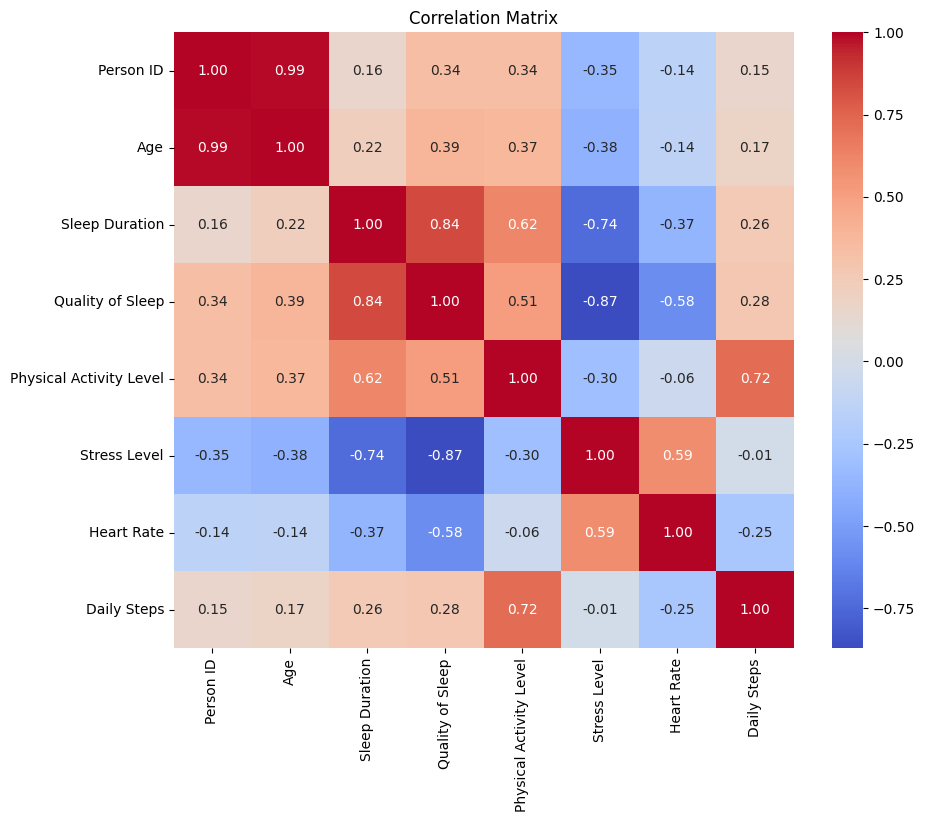

In [ ]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df1.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df1['Sleep Disorder']

In [ ]:
X.drop(['Daily Steps'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=2 )

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(multi_class='ovr', solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr', solver='liblinear')

In [ ]:
prediction = best_model.predict(X_test)
print(prediction)

[1 1 1 1 0 2 1 1 0 1 2 1 0 2 0 1 1 1 0 2 1 2 1 2 1 1 1 1 0 1 1 1 0 2 1 0 2
 1 2 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [ ]:
best_model.score(X_test,y_test)

0.9180327868852459

In [ ]:
#hidden test set
df2 = pd.read_csv('/content/drive/MyDrive/sleep_health_and_lifestyle_data_test_hidden.csv')

In [ ]:
df2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,291,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
1,292,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
2,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
3,294,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
4,295,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000


In [ ]:
model.predict(df2)

In [ ]:
pred = pd.DataFrame(prediction)
pred

,0
0,1
1,1
2,1
3,1
4,0
...,...
56,1
57,0
58,1
59,1


In [ ]:
pred.to_csv('prediction_Mostafa_Ahmed.csv', index=False)

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

y_prob = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

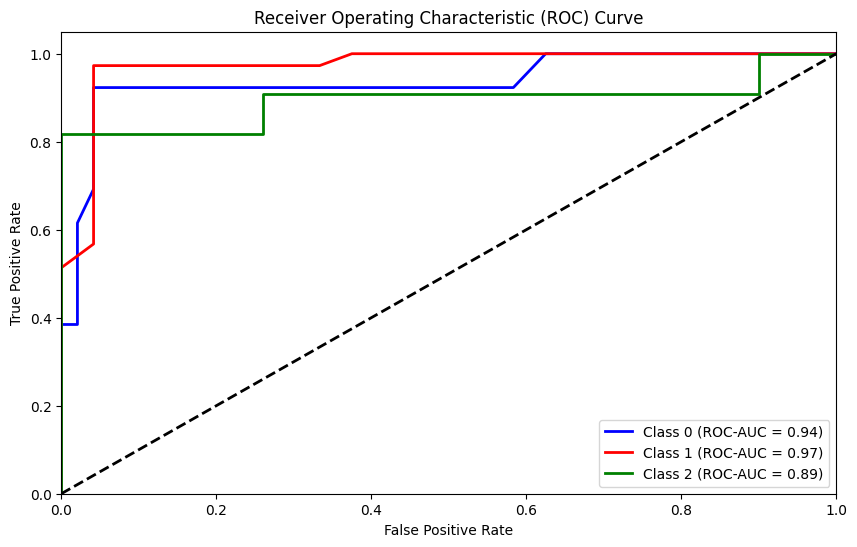

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()